In [26]:
# Homework 3 (due 07/16/2024) CREDIT: Kyrylo Bakumenko, Josh Piesner

# Eigenbears

## Instructions

#### Part 1: Data preparation (ALREADY COMPLETED)
The folder that contains this notebook also contains a data set of pictures of pandas and brown bears.
1. Load the images for train and test.
2. Reduce their size/resolution by 50%.
3. Convert the colors to grey scale.
4. Display a few of the images.

#### Part 2: Singular value decomposition (FOR YOU TO COMPLETE)
1. Follow the steps in the eigenfaces tutorial from the UW databook [[link]](https://github.com/dynamicslab/databook_python/blob/master/CH01/CH01_SEC06_2_3_4.ipynb) to perform an SVD on the images.
2. Note that you will need to "center the data" before doing the SVD. Data centering means replacing each variable $X_i$ with a new variable $X_i'$ that is equal to $X_i$ minus $X_i$'s mean value. (Think carefully about whether you want to use the mean of train set, test set, or the full data set for this.)
3. Display the first four "eigenbears" (i.e., the images associated with the first four eigenvectors). Explain what you see.
4. The singular vectors are sometimes called "principal components". Principal component analysis (PCA) is a data analysis method for which one projects high-dimensional data into the subspace of the first two singular vectors. Use the code scaffold provided below do perform PCA for the bears data. What do you notice?

#### Part 3: Non-parametric supervised classification (PARTIALLY FOR YOU TO COMPLETE)
1. Build a $k$-nearest-neighbors model with the train set, and test its accuracy on the test set. (ALREADY COMPLETE)
2. Try different values of $k$ between 1 and 15. For what value do you get the best test accuracy? (FOR YOU TO COMPLETE)
3. Which bears seem to be hard to classify? Display them.
4. What might make them hard to classify?

#### Part 4: Parametric supervised classification (PARTIALLY FOR YOU TO COMPLETE)
1. Try using logistic regression and LDA to classify the bears.
2. What method gives you the best test accuracy?
3. How does the result compare to the non-parametric classification?
4. One can use the absolute values of the regression coefficients to see which pixels have the greatest influence on the prediction of the logistic regression. Retrieving the coefficients $\beta_i$ for each pixel $X_i$ and displaying them as an image creates a "bear mask". This notebook includes code for creating that bear mask. Take a look at the bear mask and explain what you see.

#### Part 5: Robustness to additive white noise  (FOR YOU TO RUN AND COMMENT ON)
1. Rerun the code with `add_noise` set to True. The images of the bears should now be very noisy.
2. How does the additive noise affect the test accuracy of the various models and why?
3. How does additive noise affect the eigenbears and the bear mask?
4. Can you think of other types of noise that might affect the classification results differently?

--------------------------------

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os, time

## Part 1: Data preparation

In [28]:
# toggle settings
add_noise = False

# Initiliaze lists for image collection
train_images = []
test_images = []

!rm -r PandasBears
!unzip PandasBears.zip

for i, images in enumerate([train_images, test_images]):

    # set paths to images of pandas and bears in train and test set
    datasetname = ['Train','Test'][i]
    folder_path1 = 'PandasBears/{}/Pandas/'.format(datasetname)
    folder_path2 = 'PandasBears/{}/Bears/'.format(datasetname)


    for folder_path in [folder_path1, folder_path2]:

        # print the name of the folder that is currently being processed
        print(folder_path, end=' ')

        # go through all files in the folder
        file_count = 0
        for filename in os.listdir(folder_path):

            # find the files that are JPEGs
            if filename.endswith(".jpg") or filename.endswith(".jpeg"):

                # add 1 to the file count
                file_count += 1

                # Construct full file path
                file_path = os.path.join(folder_path, filename)

                # import image
                image = plt.imread(file_path, format='jpeg')

                # convert to gray scale
                image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

                # decrease image size by 50%
                image = image[::2,::2]

                if add_noise:
                    # add some noise
                    image = image + np.random.normal(scale=100, size=image.shape)

                # add the new image to collection
                images.append(image)

        print('has {} images'.format(file_count))

Archive:  PandasBears.zip
   creating: PandasBears/
   creating: PandasBears/Test/
   creating: PandasBears/Train/
   creating: PandasBears/Test/Bears/
   creating: PandasBears/Test/Pandas/
   creating: PandasBears/Train/Bears/
   creating: PandasBears/Train/Pandas/
  inflating: PandasBears/Test/Bears/261.jpeg  
  inflating: PandasBears/Test/Bears/298.jpeg  
  inflating: PandasBears/Test/Bears/277.jpeg  
  inflating: PandasBears/Test/Bears/282.jpeg  
  inflating: PandasBears/Test/Bears/294.jpeg  
  inflating: PandasBears/Test/Bears/257.jpeg  
  inflating: PandasBears/Test/Bears/256.jpeg  
  inflating: PandasBears/Test/Bears/295.jpeg  
  inflating: PandasBears/Test/Bears/283.jpeg  
  inflating: PandasBears/Test/Bears/299.jpeg  
  inflating: PandasBears/Test/Bears/276.jpeg  
  inflating: PandasBears/Test/Bears/260.jpeg  
  inflating: PandasBears/Test/Bears/284.jpeg  
  inflating: PandasBears/Test/Bears/292.jpeg  
  inflating: PandasBears/Test/Bears/251.jpeg  
  inflating: PandasBears/Tes

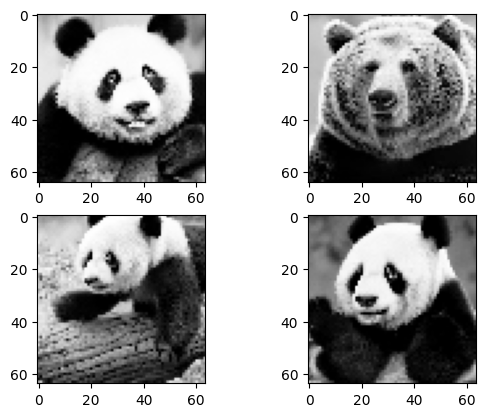

In [29]:
# look at 4 random bears
for i0, i in enumerate(np.random.randint(0, 500, size=4)):
    plt.subplot(2,2,1+i0)
    plt.imshow(train_images[i][::2,::2],cmap='Greys_r')

# Part 2: Singular value decomposition

In [30]:
train_images = np.array(train_images)
test_images = np.array(test_images)

In [31]:
train_images.shape # check shape

(500, 128, 128)

In [32]:
train_images = np.array(train_images)
test_images = np.array(test_images)

# flatten
flattened_images = train_images.reshape(train_images.shape[0], train_images.shape[1]*train_images.shape[2])
avgBear = np.mean(train_images,axis=0).flatten()

X = flattened_images - np.tile(avgBear[np.newaxis,:], (flattened_images.shape[0],1))
X = X.T

# Perform SVD
U, S, Vh = np.linalg.svd(X, full_matrices = False) # replace A with your centered data matrix

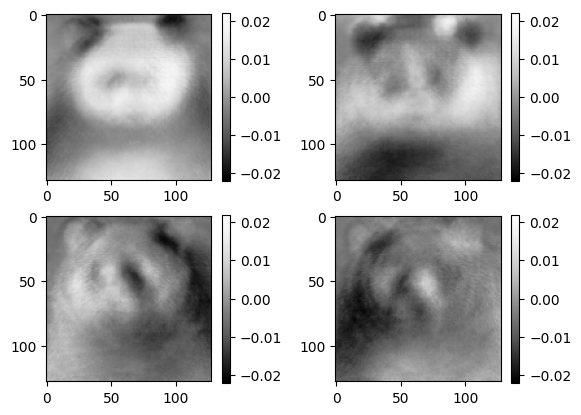

In [33]:
# show the first four eigenbears
for i in range(4):
    plt.subplot(2,2,1+i)
    plt.imshow((U[:,i]).reshape((128,128)), cmap='Greys_r',
        # force colormap to be the same for all four
        vmin=-np.max(np.abs(U[:,:4])),
        vmax=np.max(np.abs(U[:,:4])))
    plt.colorbar()
plt.subplots_adjust(wspace=0.4)

Based on observing the pictures it appears that the top-left eigenbear accounts for variation in the greater face area of the bear. Perhaps this is important to differentiate pandas from other types of bears. The top-right eigenbear seems to account for the tops of the ears and the cheaks/nose areas. The bottom-left seems to account for the 3d geometry of the head and left ear. Maybe it accounts for the rotation of the bear looking to the right. The bottom-left eigenbear seems to account for the eyes, ears, nose, and part of the chest.

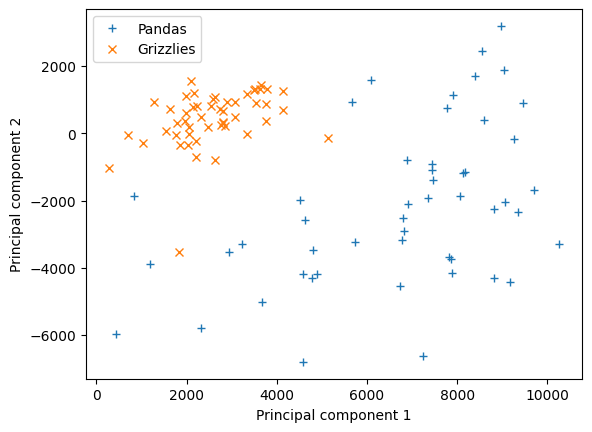

In [34]:
# Clustering of panda bears and brown bears along the first and second principal component
# indices of pandas in the test set
indices_pandas = range(50)
# indices of brown bears in the test set
indices_brownbears = range(50,100)

for i, indices in enumerate([indices_pandas, indices_brownbears]):
    # get projections of data onto principal component 1
    p1 = [np.dot(U[:,0],np.ravel(test_images[x])) for x in indices]
    # get projections of data onto principal component 2
    p2 = [np.dot(U[:,1],np.ravel(test_images[x])) for x in indices]
    plt.plot(p1, p2, marker='+x'[i], lw=0, label=['Pandas', 'Grizzlies'][i])

# annotate axes
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
# add legend
plt.legend();

The PCA seems to show that our two principal components can differentiate from pandas and grizzlies. Grizzlies photos have very little variation in principal component 1 and 2. There are a few outlier grizzlies which have levels of principal component 1 and 2 that are similar to that of the pandas. Vice versa seems to be true for the pandas. Interestingly, pandas seem to be randomly distributed among their domain, but the pandas never have high principal component 2 while having low principal component 1.

# Part 3: Nonparametric classification

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# construct response variable: Train set was created by appending 250 pandas
# and THEN 250 brown bears to the list of training images. We code pandas as
# '0' and brown bears as '1'.
flattened_train = train_images.reshape(500, 128*128)
flattened_test = test_images.reshape(100, 128*128)
x_train = np.concatenate([(flattened_train[0:250]), (flattened_train[250:500])])
y_train =  np.concatenate([np.zeros(250), np.ones(250)])

# Test set was created by appending 50 pandas and THEN 50 brown bears to the
# list of test images. We code pandas as '0' and brown bears as '1'.
x_test = np.concatenate([(flattened_test[0:50]), (flattened_test[50:100])])
y_test = np.concatenate([np.zeros(50), np.ones(50)])

In [37]:
from collections import Counter

print('   k\t|  # errors\t| misclassified bears')
print('--------------------------------------------')

misclassified_indices = []

for k in range(1,16):
    # fit KNN model
    modelKN = KNeighborsClassifier(n_neighbors=k).fit(flattened_train, y_train)

    # use model to make predictions on the test set (using flattened_test)
    predictions = modelKN.predict(flattened_test)

    # detect misclassifications
    errors = np.abs(predictions - y_test)

    # Keep track of misclassified indices
    misclassified_indices.extend((np.argwhere(errors).T)[0])
    print('    {}\t|      {} \t| {}'.format(k, int(np.sum(errors)), (np.argwhere(errors).T)[0]))

# Find 4 most common misclassified indices
most_common_indices = [index for index, count in Counter(misclassified_indices).most_common(4)]
print("\nFour most commonly misclassified bears (indices):", most_common_indices)

   k	|  # errors	| misclassified bears
--------------------------------------------
    1	|      1 	| [39]
    2	|      0 	| []
    3	|      2 	| [29 39]
    4	|      1 	| [29]
    5	|      3 	| [11 29 39]
    6	|      2 	| [11 29]
    7	|      4 	| [11 29 31 48]
    8	|      2 	| [29 48]
    9	|      4 	| [ 8 11 29 48]
    10	|      3 	| [ 8 29 48]
    11	|      4 	| [ 8 29 31 48]
    12	|      4 	| [ 8 29 31 48]
    13	|      5 	| [ 8 29 31 39 48]
    14	|      5 	| [ 8 29 31 39 48]
    15	|      7 	| [ 8  9 10 29 31 39 48]

Four most commonly misclassified bears (indices): [29, 48, 8, 39]


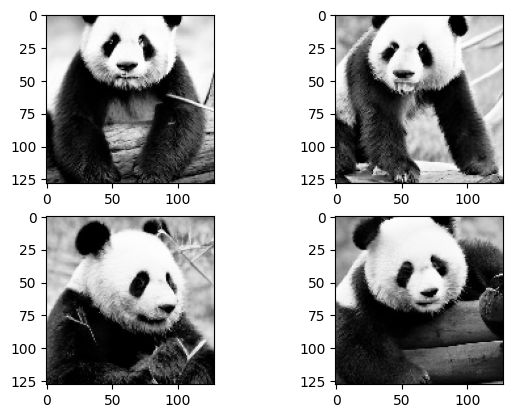

In [38]:
# Show hard-to-classify bears

# show the four most difficult bears
for i in range(4):
    plt.subplot(2,2,1+i)
    plt.imshow(test_images[most_common_indices[i]], cmap='Greys_r')


plt.subplots_adjust(wspace=0.4)

Interestingly, all the "hard to classify" bears are pandas. One important detail is that all bears here except for the bottom-right one have their ears partially cut off by the photo. It was clear that the ears were accounted for by several of the eigenbears. This could explain why these bears were mis-classified often, as they might have had misleading eigenvalues for eigenbears that accounted for ears. Also, in the same 3 photos, the arms and sometimes legs of the bears are shown. This could have made classification more diffucult as many of the bears in the training set did not have their limbs shown. Finally, the panda on the bottom-left has its mouth open and is facing a strong angle from the point of view of the image with its left ear partially obstructed.

Large angles in posture can be difficult to account for as it may distort features or completely obscure them depending on the feature & angle.

# Part 4: Parametric classification

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Logistic Regression
modelLogReg = LogisticRegression().fit(x_train, y_train)
predictionsLR = modelLogReg.predict(x_test)
errorsLR = np.abs(predictionsLR - y_test)
print("\nLogistic Regression - Number of errors:", int(np.sum(errorsLR)))

# Linear Discriminant Analysis
modelLDA = LinearDiscriminantAnalysis().fit(x_train, y_train)
predictionsLDA = modelLDA.predict(x_test)
errorsLDA = np.abs(predictionsLDA - y_test)
print("Linear Discriminant Analysis - Number of errors:", int(np.sum(errorsLDA)))


Logistic Regression - Number of errors: 0
Linear Discriminant Analysis - Number of errors: 1


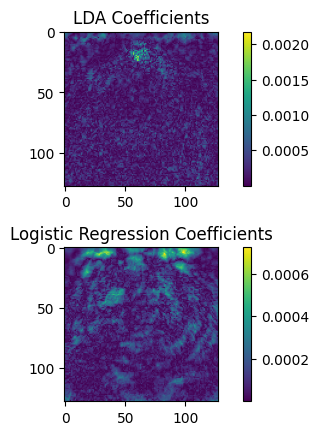

In [41]:
# linear disc
plt.subplot(2,1,1)
plt.imshow(np.abs((modelLDA.coef_).reshape((128,128))))
plt.title('LDA Coefficients')
plt.colorbar()

# logistic disc
plt.subplot(2,1,2)
plt.imshow(np.abs((modelLogReg.coef_).reshape((128,128)))) # Assuming modelLR is the LogisticRegression model
plt.title('Logistic Regression Coefficients')
plt.colorbar()

plt.subplots_adjust(hspace=0.4)
plt.show()

After adding noise, the KNN had a slight decrease in accuracy, with comptetion from k=4 for the best KNN classifier.

Every time I reran with noise, as we would expect, the model always seemed to perform lightly worse due to the increase in variation that the model cannot predict for (since the noise is random and not correlated with panda/bear).

Despite this, the noise/no-noise performance was close. With the best noise models having 1 misclassified bear (mean ~ 4) and the no-noise model having a best of 0 misclassified bears (k=2) and an average (mean ~ 3) misclassified bears.

The logistic regression went from no misclassified bears to 1 error which was panda 42.

The LDA in both cases was one misclassification, though it changed from panda/bear that was missclassified.

The random noise sort of has a dulling effect (which we can even visually see), with random noise slightly interfering th eability to select important pizels. Dspite this, the most useful pixels are strong enough to be useful for classifying nonetheless. I suspect for non-parametric KNN models, given that the noise is random, the effect may also average to 0 or otherwise be uniform (and as such inconsequential) in effect.

Nonuniform noise distributions may mean that models (such as KNN) may become more strongly affected and more likely to misclassify. Additionally, I think that noise such as large obstructions, corruptions of entire sections of the image, perhaps transformations (stretching, shrinking, flipping, rotating) or other modifications such as flipping color values would be more extreme examples of 'noise' or in some of these cases, data corruption/error.

In [42]:
# toggle settings
add_noise = True

# Initiliaze lists for image collection
train_images_noise = []
test_images_noise = []

!rm -r PandasBears
!unzip PandasBears.zip

for i, images in enumerate([train_images_noise, test_images_noise]):

    # set paths to images of pandas and bears in train and test set
    datasetname = ['Train','Test'][i]
    folder_path1 = 'PandasBears/{}/Pandas/'.format(datasetname)
    folder_path2 = 'PandasBears/{}/Bears/'.format(datasetname)


    for folder_path in [folder_path1, folder_path2]:

        # print the name of the folder that is currently being processed
        print(folder_path, end=' ')

        # go through all files in the folder
        file_count = 0
        for filename in os.listdir(folder_path):

            # find the files that are JPEGs
            if filename.endswith(".jpg") or filename.endswith(".jpeg"):

                # add 1 to the file count
                file_count += 1

                # Construct full file path
                file_path = os.path.join(folder_path, filename)

                # import image
                image = plt.imread(file_path, format='jpeg')

                # convert to gray scale
                image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

                # decrease image size by 50%
                image = image[::2,::2]

                if add_noise:
                    # add some noise
                    image = image + np.random.normal(scale=100, size=image.shape)

                # add the new image to collection
                images.append(image)

        print('has {} images'.format(file_count))

Archive:  PandasBears.zip
   creating: PandasBears/
   creating: PandasBears/Test/
   creating: PandasBears/Train/
   creating: PandasBears/Test/Bears/
   creating: PandasBears/Test/Pandas/
   creating: PandasBears/Train/Bears/
   creating: PandasBears/Train/Pandas/
  inflating: PandasBears/Test/Bears/261.jpeg  
  inflating: PandasBears/Test/Bears/298.jpeg  
  inflating: PandasBears/Test/Bears/277.jpeg  
  inflating: PandasBears/Test/Bears/282.jpeg  
  inflating: PandasBears/Test/Bears/294.jpeg  
  inflating: PandasBears/Test/Bears/257.jpeg  
  inflating: PandasBears/Test/Bears/256.jpeg  
  inflating: PandasBears/Test/Bears/295.jpeg  
  inflating: PandasBears/Test/Bears/283.jpeg  
  inflating: PandasBears/Test/Bears/299.jpeg  
  inflating: PandasBears/Test/Bears/276.jpeg  
  inflating: PandasBears/Test/Bears/260.jpeg  
  inflating: PandasBears/Test/Bears/284.jpeg  
  inflating: PandasBears/Test/Bears/292.jpeg  
  inflating: PandasBears/Test/Bears/251.jpeg  
  inflating: PandasBears/Tes

In [43]:
train_images_noise = np.array(train_images_noise)
test_images_noise = np.array(test_images_noise)

# flatten
flattened_images = train_images_noise.reshape(train_images_noise.shape[0], train_images_noise.shape[1]*train_images_noise.shape[2])
avgBear = np.mean(train_images_noise,axis=0).flatten()

X = flattened_images - np.tile(avgBear[np.newaxis,:], (flattened_images.shape[0],1))
X = X.T

# Perform SVD
U, S, Vh = np.linalg.svd(X, full_matrices = False) # replace A with your centered data matrix

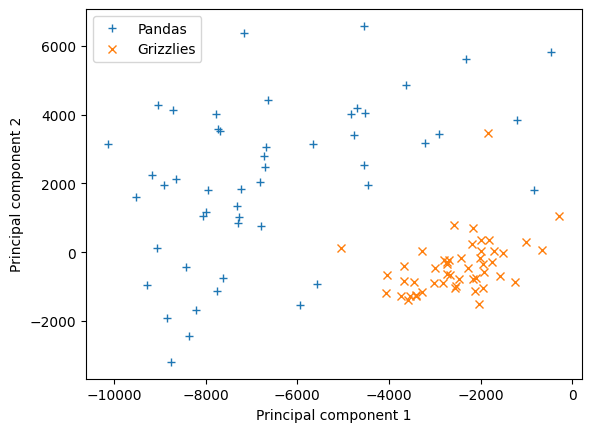

In [44]:
### NO NOISE ###
# Clustering of panda bears and brown bears along the first and second principal component
# indices of pandas in the test set
indices_pandas = range(50)
# indices of brown bears in the test set
indices_brownbears = range(50,100)

for i, indices in enumerate([indices_pandas, indices_brownbears]):
    # get projections of data onto principal component 1
    p1 = [np.dot(U[:,0],np.ravel(test_images[x])) for x in indices]
    # get projections of data onto principal component 2
    p2 = [np.dot(U[:,1],np.ravel(test_images[x])) for x in indices]
    plt.plot(p1, p2, marker='+x'[i], lw=0, label=['Pandas', 'Grizzlies'][i])

# annotate axes
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
# add legend
plt.legend();

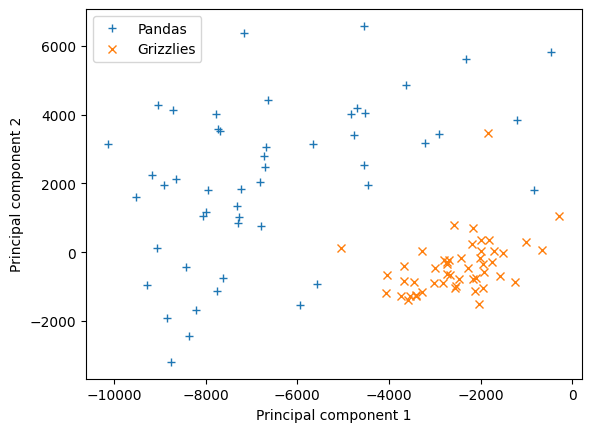

In [45]:
### NOISE ###

# Clustering of panda bears and brown bears along the first and second principal component
# indices of pandas in the test set
indices_pandas = range(50)
# indices of brown bears in the test set
indices_brownbears = range(50,100)

for i, indices in enumerate([indices_pandas, indices_brownbears]):
    # get projections of data onto principal component 1
    p1 = [np.dot(U[:,0],np.ravel(test_images[x])) for x in indices]
    # get projections of data onto principal component 2
    p2 = [np.dot(U[:,1],np.ravel(test_images[x])) for x in indices]
    plt.plot(p1, p2, marker='+x'[i], lw=0, label=['Pandas', 'Grizzlies'][i])

# annotate axes
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
# add legend
plt.legend();

In [46]:
# construct response variable: Train set was created by appending 250 pandas
# and THEN 250 brown bears to the list of training images. We code pandas as
# '0' and brown bears as '1'.
flattened_train_noise = train_images.reshape(500, 128*128)
flattened_test_noise = test_images.reshape(100, 128*128)
x_train_noise = np.concatenate([(flattened_train_noise[0:250]), (flattened_train_noise[250:500])])

# Test set was created by appending 50 pandas and THEN 50 brown bears to the
# list of test images. We code pandas as '0' and brown bears as '1'.
x_test_noise = np.concatenate([(flattened_test_noise[0:50]), (flattened_test_noise[50:100])])

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Logistic Regression
modelLogReg = LogisticRegression().fit(x_train_noise, y_train)
predictionsLR = modelLogReg.predict(x_test_noise)
errorsLR = np.abs(predictionsLR - y_test)
print("\nLogistic Regression - Number of errors:", int(np.sum(errorsLR)))

# Linear Discriminant Analysis
modelLDA = LinearDiscriminantAnalysis().fit(x_train_noise, y_train)
predictionsLDA = modelLDA.predict(x_test_noise)
errorsLDA = np.abs(predictionsLDA - y_test)
print("Linear Discriminant Analysis - Number of errors:", int(np.sum(errorsLDA)))


Logistic Regression - Number of errors: 0
Linear Discriminant Analysis - Number of errors: 1


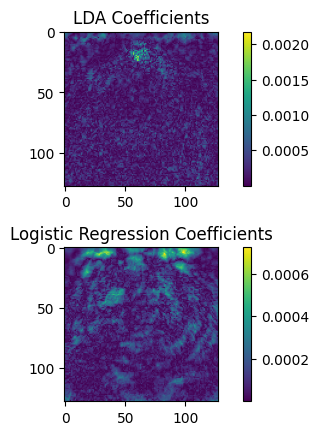

In [48]:
# linear disc
plt.subplot(2,1,1)
plt.imshow(np.abs((modelLDA.coef_).reshape((128,128))))
plt.title('LDA Coefficients')
plt.colorbar()

# logistic disc
plt.subplot(2,1,2)
plt.imshow(np.abs((modelLogReg.coef_).reshape((128,128)))) # Assuming modelLR is the LogisticRegression model
plt.title('Logistic Regression Coefficients')
plt.colorbar()

plt.subplots_adjust(hspace=0.4)
plt.show()